In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import joblib



In [7]:
## Load train data
data_dict = {} # separate data by .txt file

directory = 'IMU-train'


full_data = None # combined data for K-means

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    
    if filename.endswith('.txt'):
        data = np.loadtxt(filepath, delimiter='\t')  
                
        data_dict[filename] = data

        print(filename + ':')
        print(data.shape)
        print(data)
        print('\n')

        # update full data
        if full_data is None:
            full_data = data
        else:
            full_data = np.concatenate((full_data, data), axis=0)
    else:
        raise Exception('non-.txt file in training folder')
    
print("full data shape: ", full_data.shape)

wave03.txt:
(3225, 7)
[[ 2.850000e+02  3.583370e-01  8.126800e-02 ...  9.277115e+00
  -8.531200e-02  5.106064e+00]
 [ 2.890000e+02  3.743590e-01  9.835800e-02 ...  9.258072e+00
  -1.305390e-01  5.182236e+00]
 [ 2.940000e+02  3.882450e-01  1.149140e-01 ...  9.246170e+00
  -8.531200e-02  5.251266e+00]
 ...
 [ 1.650700e+04  1.489870e-01  1.282650e-01 ...  9.246170e+00
  -1.523056e+00  5.317917e+00]
 [ 1.651200e+04  1.372380e-01  1.442870e-01 ...  9.231888e+00
  -1.494492e+00  5.446457e+00]
 [ 1.651800e+04  1.254880e-01  1.629790e-01 ...  9.222366e+00
  -1.534958e+00  5.396469e+00]]


wave02.txt:
(2526, 7)
[[ 2.860000e+02  4.257000e-03 -1.985780e-01 ...  9.460403e+00
  -2.447970e-01  4.918015e+00]
 [ 2.890000e+02  4.257000e-03 -1.985780e-01 ...  9.567520e+00
  -2.114720e-01  4.972763e+00]
 [ 2.940000e+02 -3.220000e-03 -1.964420e-01 ...  9.543716e+00
  -1.900480e-01  4.975143e+00]
 ...
 [ 1.298800e+04  1.313630e-01  1.611300e-02 ...  9.008133e+00
  -1.646835e+00  5.486923e+00]
 [ 1.299300e+

In [8]:
## Visualize each type of motion
vis_directory = 'IMU-train-visuals'

## for Wx Wy Wz
for filename, data in data_dict.items():
    Wx, Wy, Wz = data[:, 1], data[:, 2], data[:, 3]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(Wx, Wy, Wz)
    
    ax.set_xlabel('Wx')
    ax.set_ylabel('Wy')
    ax.set_zlabel('Wz')
    
    plt.title(f'3D Plot for {filename}')
    plt.savefig(f'{vis_directory}/{filename[:-4]}_Ws_3dplot.png')

    plt.close(fig)

## for Ax Ay Az
for filename, data in data_dict.items():
    Ax, Ay, Az = data[:, 4], data[:, 5], data[:, 6]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(Ax, Ay, Az)
    
    ax.set_xlabel('Ax')
    ax.set_ylabel('Ay')
    ax.set_zlabel('Az')
    
    plt.title(f'3D Plot for {filename}')
    plt.savefig(f'{vis_directory}/{filename[:-4]}_As_3dplot.png')

    plt.close(fig)

In [4]:
### concat data of same motion/class
concat_dict = {} # for training HMM

# print(data_dict.keys())

for filename, data in data_dict.items():
    if filename[:5] == "beat3":
        key = "beat3"
    elif filename[:5] == "beat4":
        key = "beat4"
    elif filename[:6] == "circle":
        key = "circle"
    elif filename[:5] == "eight":
        key = "eight"
    elif filename[:3] == "inf":
        key = "inf"
    elif filename[:4] == "wave":
        key = "wave"

    if key in concat_dict:
        # TODO: what to do with time data?
        concat_dict[key] = np.concatenate((concat_dict[key], data), axis=0)
    else:
        concat_dict[key] = data
    

for motion, data in concat_dict.items():
    print(f"{motion} shape: {data.shape}")


wave shape: (14530, 7)
circle shape: (10627, 7)
eight shape: (14301, 7)
inf shape: (12417, 7)
beat4 shape: (14034, 7)
beat3 shape: (13431, 7)


In [5]:
### Perform K-means
cluster_data = full_data[:, 1:]
print(cluster_data.shape)

# M = 80 # number of clusters, aka number of observation classes
cluster_counts = [50, 60, 70, 80, 90, 100]

kmeans_models = {}

kmeans_labels = {}

for M in cluster_counts:
    kmeans = KMeans(n_clusters=M).fit(cluster_data)

    # The cluster labels for each input
    labels = kmeans.labels_

    # The coordinates of the cluster centers
    cluster_centers = kmeans.cluster_centers_

    print("Cluster labels:", labels)
    print("Cluster size:")
    print(len(set(labels))) # should be equal to M
    # print("Cluster centers:", cluster_centers)

    kmeans_models[M] = kmeans
    kmeans_labels[M] = labels

(79340, 6)


/Users/thomaswiener/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [1 1 1 ... 8 8 8]
Cluster size:
50


/Users/thomaswiener/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [16 16 16 ...  4  4  4]
Cluster size:
60


/Users/thomaswiener/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [12 12 12 ... 24 24 24]
Cluster size:
70


/Users/thomaswiener/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [ 7  7  7 ... 26 26 26]
Cluster size:
80


/Users/thomaswiener/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [1 1 1 ... 2 2 2]
Cluster size:
90


/Users/thomaswiener/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [7 7 7 ... 5 5 5]
Cluster size:
100


50
60
70
80
90
100


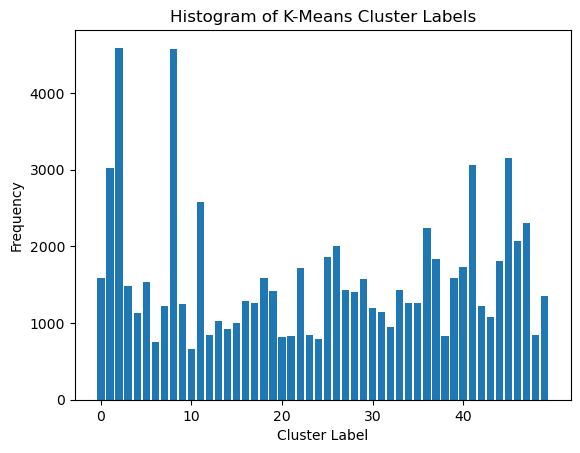

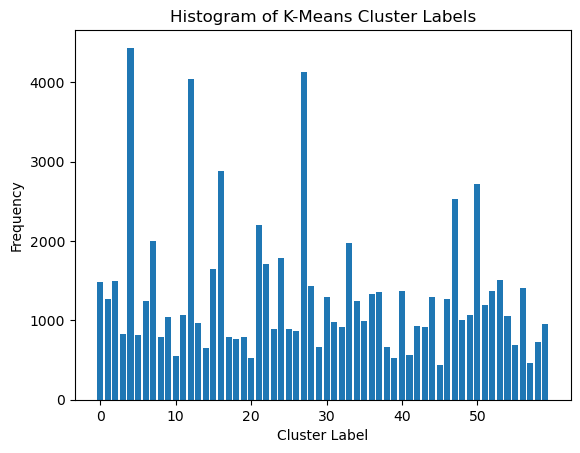

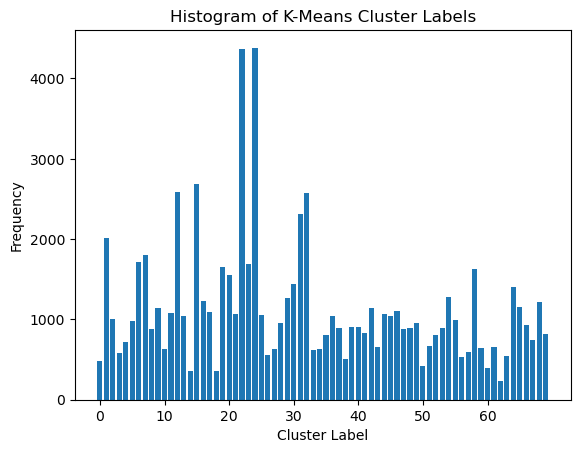

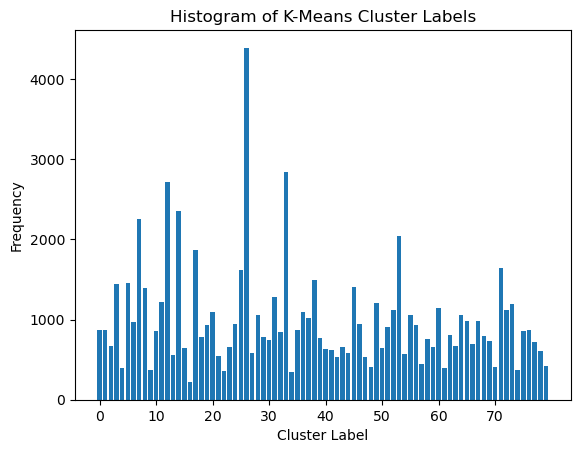

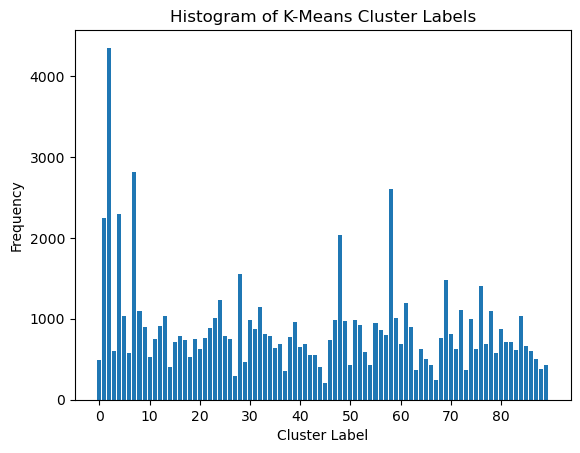

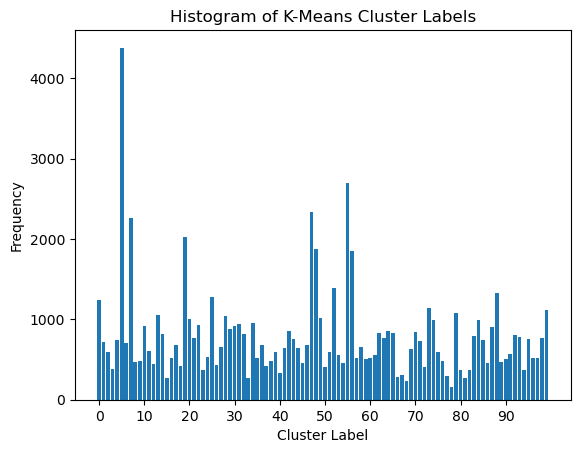

In [6]:
### K-means visualizations

for M, labels in kmeans_labels.items():
    ## labels histogram
    plt.figure()
    print(len(set(labels))) # should be equal to M
    plt.hist(labels, bins=range(len(set(labels)) + 1), align='left', rwidth=0.8)

    plt.title('Histogram of K-Means Cluster Labels')
    plt.xlabel('Cluster Label')
    plt.ylabel('Frequency')

    plt.xticks(range(0, len(set(labels)), 10))
    plt.savefig(f'IMU-train-visuals/Kmeans_cluster_histograms/{M}_clusters_hist')


In [7]:
### Save parameters/classifications and data
for M, kmeans in kmeans_models.items():
    ## saving kmeans model
    kmeans_fn = f'kmeans_model_{M}.pkl'
    ## Source: https://stackoverflow.com/questions/54879434/how-to-use-pickle-to-save-sklearn-model recommended joblib for pickling kmeans models
    joblib.dump(kmeans, f'Kmeans-models/{kmeans_fn}')

In [3]:
### loading kmeans models for additional histograms
kmeans_labels = {}

for M in [50, 60, 70, 80, 90, 100]:
    kmeans_fn = f'kmeans_model_{M}.pkl'
    Km_model = joblib.load(f'Kmeans-models/{kmeans_fn}')
    kmeans_labels[M] = Km_model.labels_

In [4]:
## function to turn emission sequence into array counting consecutive values for histogram
def count_consecutive_values(arr):
    if len(arr) == 0:
        return []
    
    curr = arr[0]
    count = 1
    counts = []
    
    for emmission in arr[1:]:
        if emmission == curr:
            count += 1
        else:
            counts.append(count)
            curr = emmission
            count = 1
    
    counts.append(count) # add last count
    
    return counts

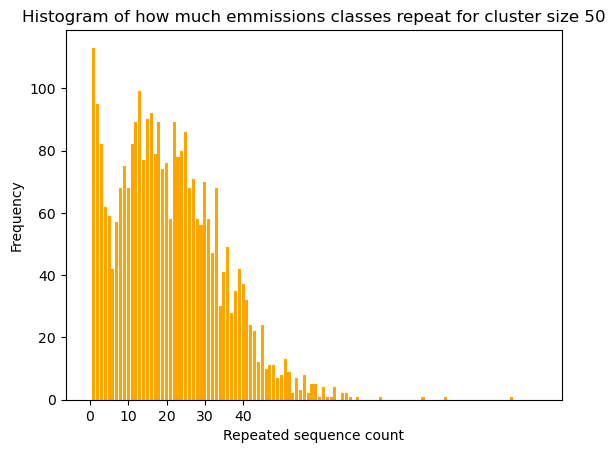

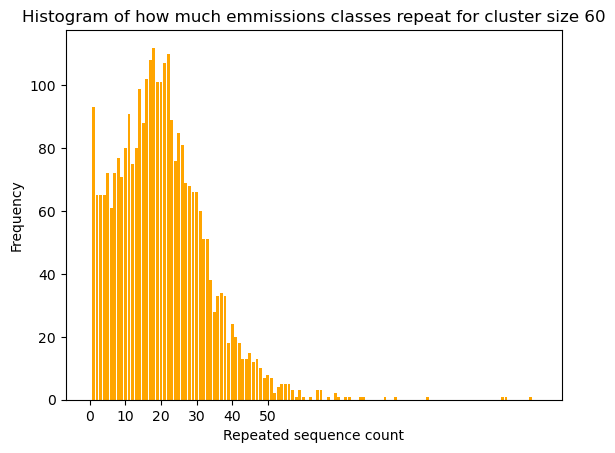

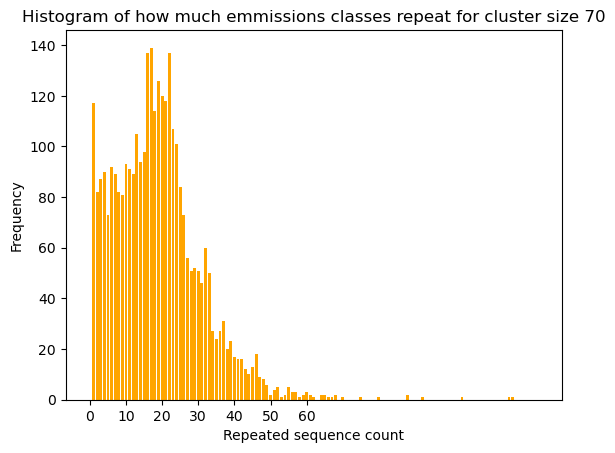

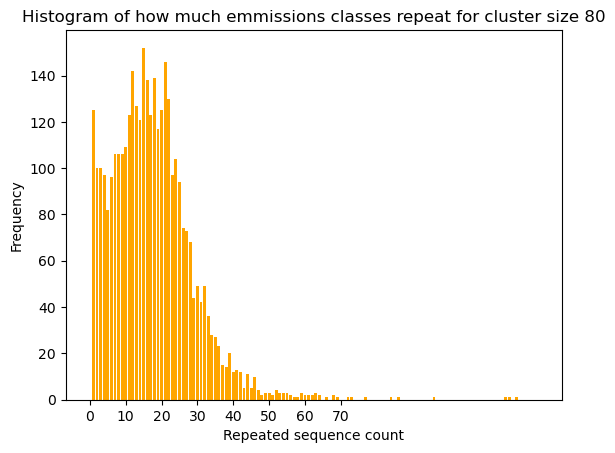

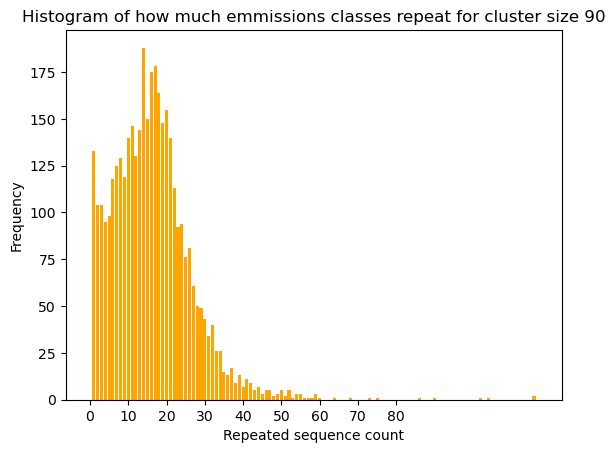

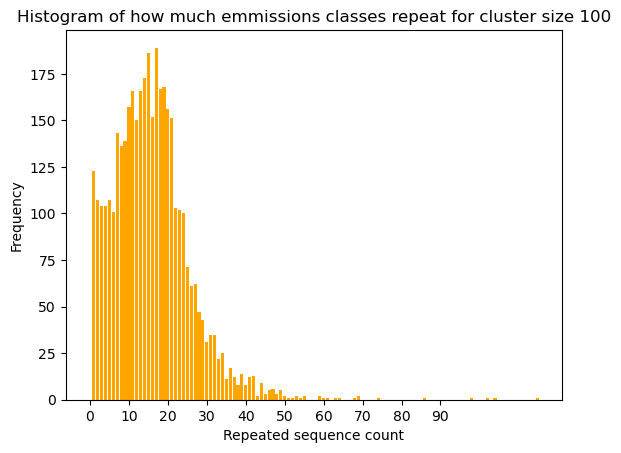

In [6]:
## kmeans visualizations continued: histograms showing how often emissions typically repeat
for M, labels in kmeans_labels.items():
    ## repeated counts histogram
    plt.figure()
    counts = count_consecutive_values(labels)
    plt.hist(counts, bins=range(len(set(counts)) + 1), align='left', rwidth=0.8, color='orange')

    plt.title(f'Histogram of how much emmissions classes repeat for cluster size {M}')
    plt.xlabel('Repeated sequence count')
    plt.ylabel('Frequency')

    plt.xticks(range(0, len(set(labels)), 10))
    plt.savefig(f'IMU-train-visuals/Kmeans_cluster_histograms/{M}_repeated_emissions_hist')